# Project 2: Ames Housing Prediction Model


## Importing necesserary libaries
---

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import math
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

---
**Note:** All processes will be conducted on both train and test datasets simultaneously, but I will only be describing the work done on the train dataset.

In [2]:
ames = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## EDA

---

In [3]:
# Taking a look at all features and data types.
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
ames.shape

(2051, 81)

In [5]:
pd.set_option('display.max_columns', len(ames))  #uncomment this to see the entire output
#pd.reset_option('display.max_rows')   #uncomment this to see the truncated output
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


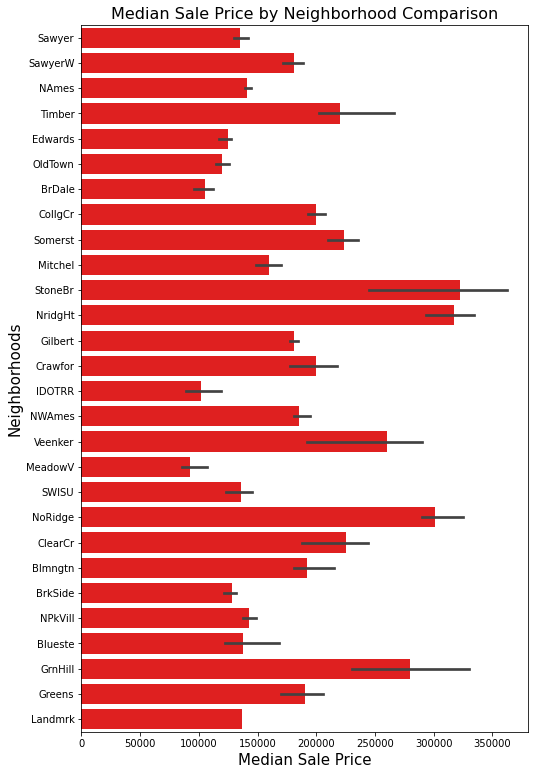

In [6]:
#Plotting Neighborhood v Median Sale Price
fig, ax = plt.subplots(figsize=(8,13))
sns.barplot(x='SalePrice', y='Neighborhood', data=ames, estimator=np.median, orient='h', color='r');
plt.title('Median Sale Price by Neighborhood Comparison', fontsize=16);
plt.ylabel('Neighborhoods', fontsize=15);
plt.xlabel('Median Sale Price', fontsize=15);

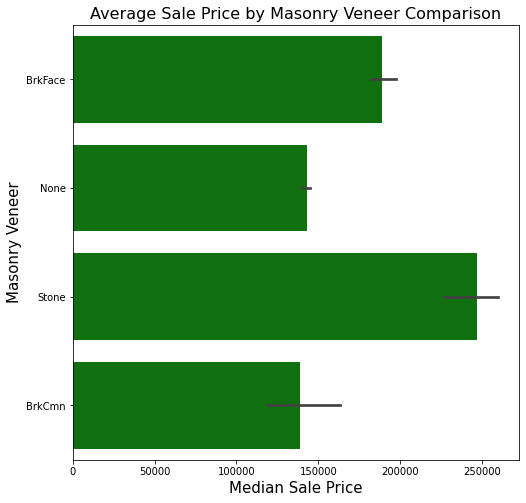

In [7]:
#Plotting Masonry Veneer Type v Median Sale Price
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='SalePrice', y='Mas Vnr Type', data=ames, estimator=np.median, orient='h', color='g');
plt.title('Average Sale Price by Masonry Veneer Comparison', fontsize=16);
plt.ylabel('Masonry Veneer', fontsize=15);
plt.xlabel('Median Sale Price', fontsize=15);

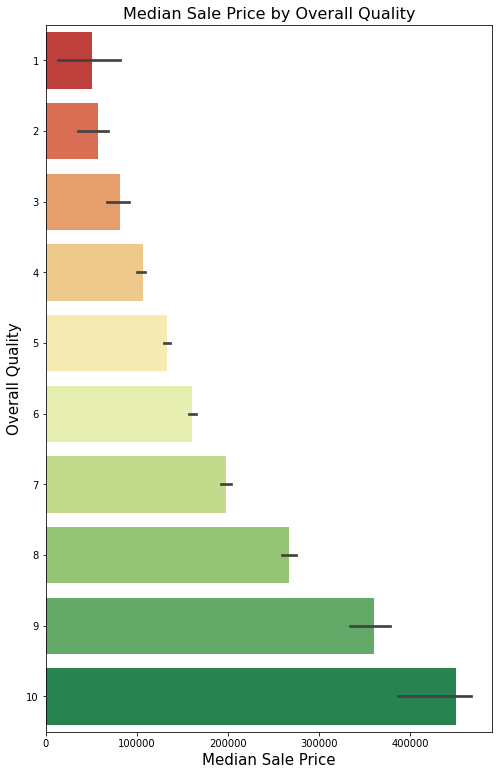

In [8]:
#Plotting Overall Quality v Median Sale Price
fig, ax = plt.subplots(figsize=(8,13))
sns.barplot(x='SalePrice', y='Overall Qual', data=ames, estimator=np.median, orient='h', palette='RdYlGn');
plt.title('Median Sale Price by Overall Quality', fontsize=16);
plt.ylabel('Overall Quality', fontsize=15);
plt.xlabel('Median Sale Price', fontsize=15);

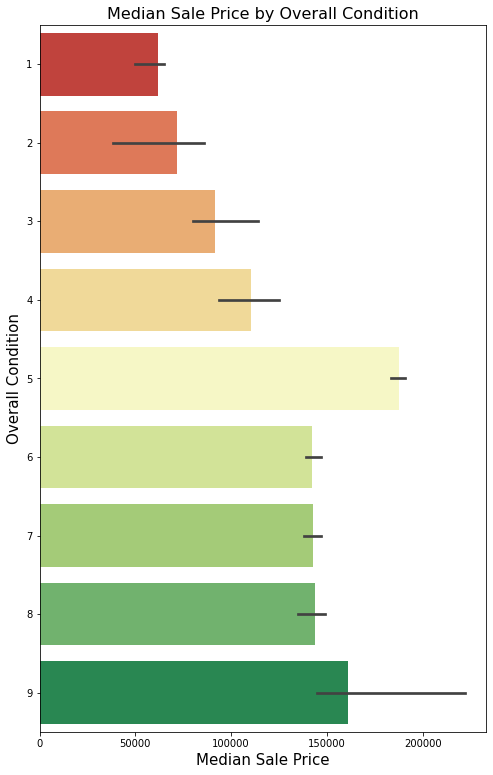

In [9]:
#Plotting Overall Condition v Median Sale Price
fig, ax = plt.subplots(figsize=(8,13))
sns.barplot(x='SalePrice', y='Overall Cond', data=ames, estimator=np.median, orient='h', palette='RdYlGn');
plt.title('Median Sale Price by Overall Condition', fontsize=16);
plt.ylabel('Overall Condition', fontsize=15);
plt.xlabel('Median Sale Price', fontsize=15);

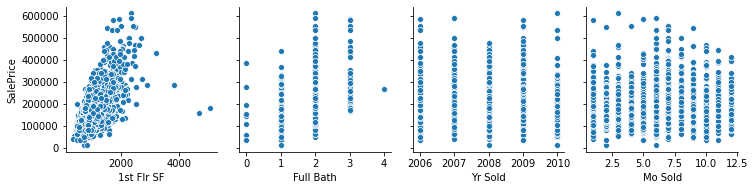

In [10]:
# Looking at several features to see if there is an interaction with sale price.
sns.pairplot(ames, x_vars=['1st Flr SF', 'Full Bath', 'Yr Sold', 'Mo Sold'], y_vars=['SalePrice']);

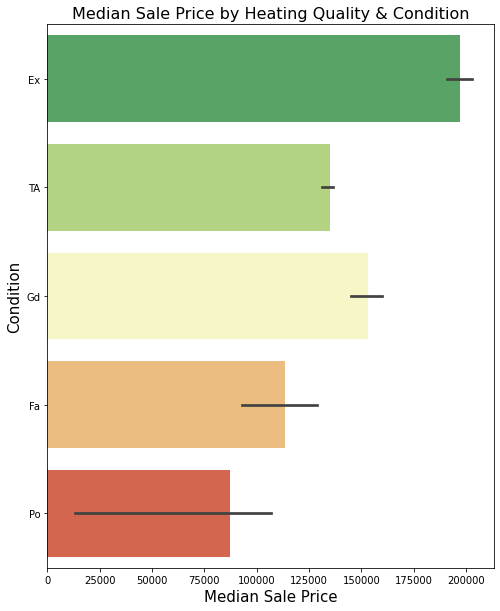

In [11]:
#Plotting Heating QC v Median Sale Price
fig, ax = plt.subplots(figsize=(8,10))
sns.barplot(x='SalePrice', y='Heating QC', data=ames, estimator=np.median, orient='h', palette='RdYlGn_r');
plt.title('Median Sale Price by Heating Quality & Condition', fontsize=16);
plt.ylabel('Condition', fontsize=15);
plt.xlabel('Median Sale Price', fontsize=15);

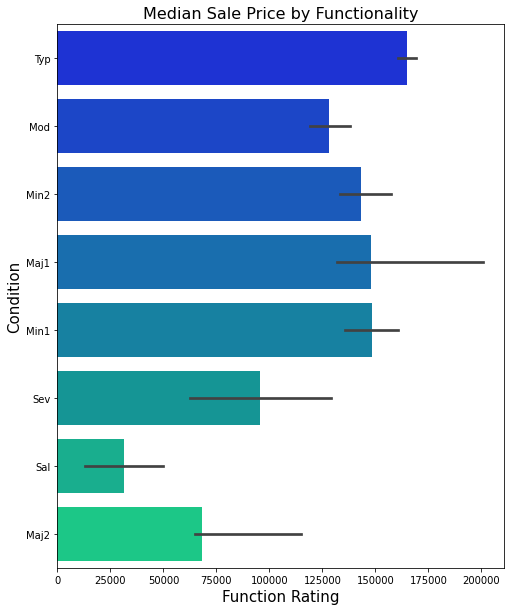

In [12]:
#Plotting Functionality v Median Sale Price
fig, ax = plt.subplots(figsize=(8,10))
sns.barplot(x='SalePrice', y='Functional', data=ames, estimator=np.median, orient='h', palette='winter');
plt.title('Median Sale Price by Functionality', fontsize=16);
plt.ylabel('Condition', fontsize=15);
plt.xlabel('Function Rating', fontsize=15);

# Cleaning and Feature Work
---

In [13]:
# Before we begin lets remove the "NA"s and replace them with 0.  Same with nulls as most nulls will be handled in the get-dummies processs.
ames = ames.replace('NA', 0)
ames = ames.replace('None', 0)
ames = ames.replace(np.NaN, 0)

In [14]:
test = test.replace('NA', 0)
test = test.replace('None', 0)
test = test.replace(np.NaN, 0)

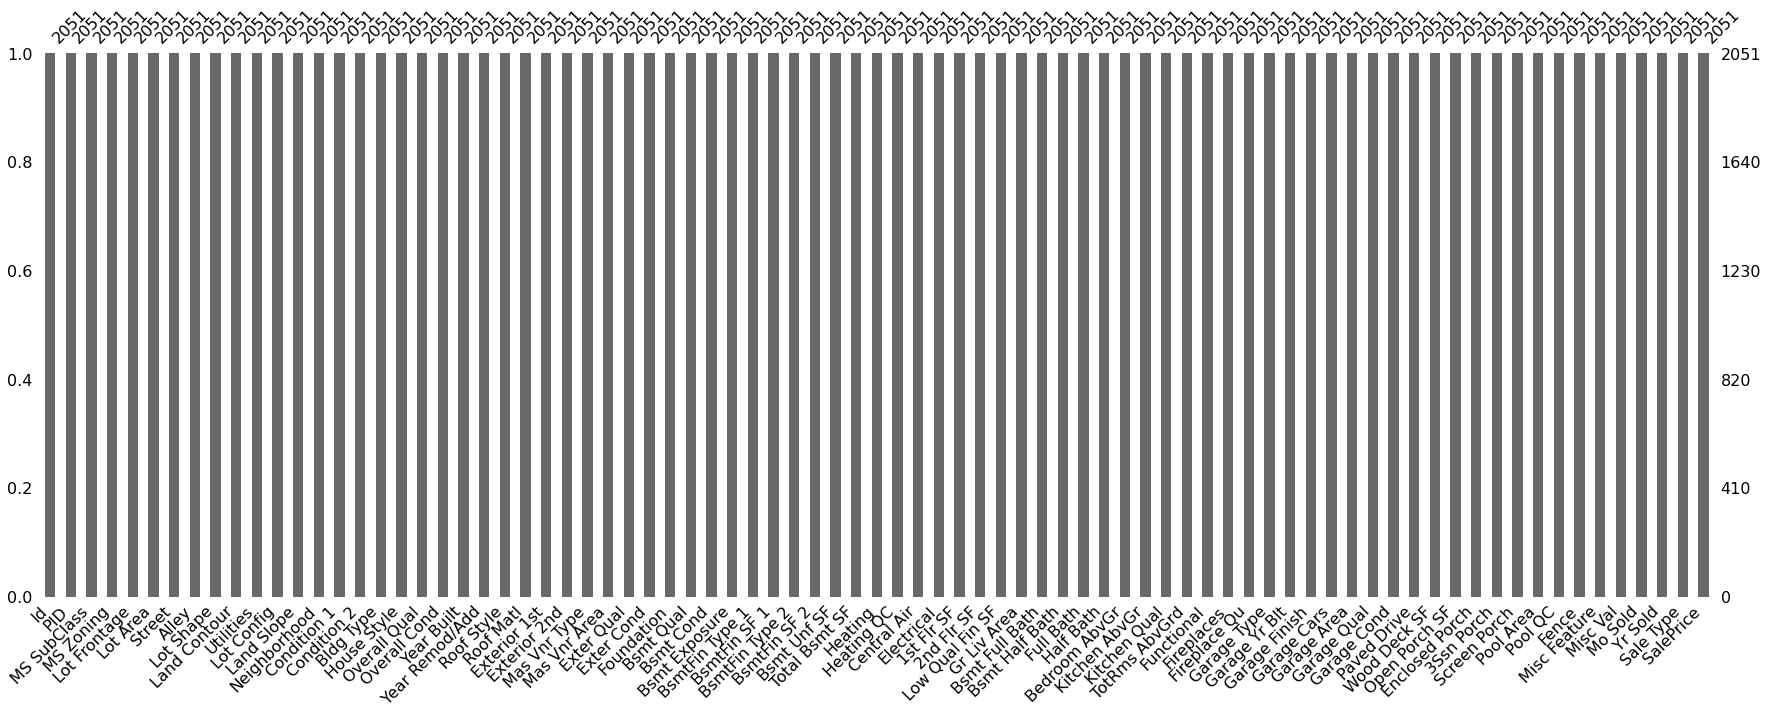

In [15]:
# Quick visual verification of null removal.
ms.bar(ames, labels=True, figsize=(30,10));

## Dropping Columns
---

1. **MS SubClass** - This is mingled data and could be imputed by using the data in the other columns.
2. **Gr Liv Area** - This column is redundant and risks mulitcollinearity.
3. **Pool Area** - This column does not meet the minmum of n >= 30, so it cannot possibly acheive staistical signiigance.
4. **Pool QC** - This column does not meet the minmum of n >= 30, so it cannot possibly acheive staistical signiigance. 

    







#### Identified Issues
1. Bedrooms and kitchens that are belwo grade are not counted in any column.  Therefore we cannot be sure any room counts are accurate. Bedrooms and kitchens below grade do count for a house if they are up to code.
2. Sale prices are not adjusted for inflation and they will not be in kaggle so it would be disruptve to change them here.


In [16]:
# Dropping columns per above.
ames = ames.drop(columns={'MS SubClass', 'Gr Liv Area', 'Pool Area', 'Pool QC'}, axis=1)
ames.head()

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1.0,0.0,1,0,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,0.0,0.0,2,1,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,0.0,0.0,2,0,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,3,2010,WD,138500


In [17]:
test = test.drop(columns={'MS SubClass', 'Gr Liv Area', 'Pool Area', 'Pool QC'}, axis=1)

## Get Dummies Treatment
---
1. **Ms Zoning** - Create new columns for each type of zoning.
2. **Lot Shape** - Create new columns for each type of lot shape.
3. **Lot Config** - Create new columns for each type of lot configuration.
4. **Land Slope** - Create new columns for each type of land slope.
5. **Neighborhood** - This may be the most important set of data in this set
6. **Building Type** - Create new columns for each type of building.
7. **House Style** - Create new columns for each type of style.
8. **Roof Style** - Create new columns for each type of style.
9. **Roof Matl** - Create new columns for each type of material.
10. **Mas Vnr Type** - Create new columns for each type of material.
11. **Foundation** - Create new columns for each type of material.
12. **Bsmt Qual** - Create new columns for each type of quality because there is an axtra dimension buired in this variable.
13. **Heating** - Create new columns for each type of heating.
14. **Central Air** - Create new column for AC. 1=yes and 0=no
15. **Electrical** - Create new columns for each type of electrical.
16. **Garage Type** -  Create new columns for each type of garage.  Prefeably NA would be first column and could be dropped.
17. **Garage Finish** - Create new columns for each type of garage finish.
18. **Paved Drive** - Create new columns for each type of driveways.
19. **Fence** - Create new columns for each type of fence. Prefeably NA would be first column and could be dropped.
20. **Mo Sold** - Create new columns for each month.
21. **Yr Sold** - Create new columns for each year.
22. **Sale Type** - Create new columns for each sale type.
23. **Sale Condition** - Create new columns for each type of sale condition. *This one is in the Data Dictionary but not in the data.*

In [18]:
# Creating dummy colomns.  Lots and Lots of them.  Then dropping the origin column.
ames_dum = pd.get_dummies(data=ames[['MS Zoning', 'Lot Shape','Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Paved Drive', 'Fence', 'Mo Sold', 'Yr Sold', 'Sale Type']], drop_first=False, dtype=int)
ames = pd.concat([ames, ames_dum], axis=1);
ames = ames.drop(columns=['MS Zoning', 'Lot Shape','Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Paved Drive', 'Fence', 'Mo Sold', 'Yr Sold', 'Sale Type'])
ames.head(2)  


,Id,PID,Lot Frontage,Lot Area,Street,Alley,Land Contour,Utilities,Condition 1,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Feature,Misc Val,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_0,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_0,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_0,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,0.0,13517,Pave,0,Lvl,AllPub,RRAe,Norm,6,8,1976,2005,HdBoard,Plywood,289.0,Gd,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,Ex,725,754,0,0.0,0.0,2,1,3,1,Gd,6,Typ,0,0,1976.0,RFn,2.0,475.0,TA,TA,0,44,0,0,0,0,0,130500,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,0,Lvl,AllPub,Norm,Norm,7,5,1996,1997,VinylSd,VinylSd,132.0,Gd,TA,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,Ex,913,1209,0,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,1997.0,RFn,2.0,559.0,TA,TA,0,74,0,0,0,0,0,220000,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 180 entries, Id to Sale Type_WD 
dtypes: float64(11), int64(147), object(22)
memory usage: 2.8+ MB


In [20]:
test_dum = pd.get_dummies(data=test[['MS Zoning', 'Lot Shape','Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Paved Drive', 'Fence', 'Mo Sold', 'Yr Sold', 'Sale Type']], drop_first=False, dtype=int)
test = pd.concat([test, test_dum], axis=1);
test = test.drop(columns=['MS Zoning', 'Lot Shape','Lot Config', 'Land Slope', 'Neighborhood', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Heating', 'Central Air', 'Electrical', 'Garage Type', 'Paved Drive', 'Fence', 'Mo Sold', 'Yr Sold', 'Sale Type'])

## Delineatation
---
1. **Overall Qual** - 1-10, Very Poor - Very Excellent, ASSUMPTION: "Distance" between all categories is equal.
2. **Overall Cond** - 1-10, Very Poor - Very Excellent, ASSUMPTION: "Distance" between all categories is equal.
3. **Exter Qual** - 1-5, Poor - Excellent, ASSUMPTION: "Distance" between all categories is equal.
4. **Exter Cond** - 1-5, Poor - Excellent, ASSUMPTION: "Distance" between all categories is equal.
5. **Bsmt Cond** - 1-5, Poor - Excellent, *Nulls represent no basemment* ASSUMPTION: "Distance" between all categories is equal.
6. **Bsmt Exposure** - 1-5, No Exposure - Good Exposure, *Nulls represent no basemment* ASSUMPTION: "Distance" between all categories is equal.
7. **HeatingQC** - 1-5, Poor - Excellent, ASSUMPTION: "Distance" between all categories is equal.
8. **KitchenQual** - 1-5, Poor - Excellent, ASSUMPTION: "Distance" between all categories is equal.
9. **Functional** - 1-8, Salvage - Typical, ASSUMPTION: "Distance" between all categories is equal.
10. **FireplaceQu** - 1-5, Poor - Excellent, *Nulls represent no fireplace* ASSUMPTION: "Distance" between all categories is equal.
11. **Garage Qual** - 1-5, Poor - Excellent, *Nulls represent no garage* ASSUMPTION: "Distance" between all categories is equal.
12. **Garage Cond** - 1-5, Poor - Excellent, *Nulls represent no garage* ASSUMPTION: "Distance" between all categories is equal.
13. **Pool QC** - 1-4, Fair - Excellent, *Nulls represent no garage* ASSUMPTION: "Distance" between all categories is equal.

In [21]:
'''Since the codes seem to have some reptition to them lets create some dictionary variables'''
dict5 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dict4b = {'Gd':3, 'Av':2, 'Mn':1, 'No':0}
dict8f = {'Typ':8,'Min1':7,'Min2':6,'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
dict4p = {'Gd':3, 'Av':2, 'Mn':1, 'No':0}

ames['Exter Qual'] = ames['Exter Qual'].map(dict5).astype(int)
ames['Exter Cond'] = ames['Exter Cond'].map(dict5).astype(int)
ames['Bsmt Cond'] = ames['Bsmt Cond'].map(dict5)
ames['Bsmt Exposure'] = ames['Bsmt Exposure'].map(dict4b)
ames['Heating QC'] = ames['Heating QC'].map(dict5)
ames['Kitchen Qual'] = ames['Kitchen Qual'].map(dict5)
ames['Functional'] = ames['Functional'].map(dict8f)
ames['Fireplace Qu'] = ames['Fireplace Qu'].map(dict5)
ames['Garage Qual'] = ames['Garage Qual'].map(dict5)
ames['Garage Cond'] = ames['Exter Cond'].map(dict5)


In [22]:
test['Exter Qual'] = test['Exter Qual'].map(dict5).astype(int)
test['Exter Cond'] = test['Exter Cond'].map(dict5).astype(int)
test['Bsmt Cond'] = test['Bsmt Cond'].map(dict5)
test['Bsmt Exposure'] = test['Bsmt Exposure'].map(dict4b)
test['Heating QC'] = test['Heating QC'].map(dict5)
test['Kitchen Qual'] = test['Kitchen Qual'].map(dict5)
test['Functional'] = test['Functional'].map(dict8f)
test['Fireplace Qu'] = test['Fireplace Qu'].map(dict5)
test['Garage Qual'] = test['Garage Qual'].map(dict5)
test['Garage Cond'] = test['Exter Cond'].map(dict5)

In [23]:
ames.head(2)

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Land Contour,Utilities,Condition 1,Condition 2,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Misc Feature,Misc Val,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_0,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_0,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_0,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,0.0,13517,Pave,0,Lvl,AllPub,RRAe,Norm,6,8,1976,2005,HdBoard,Plywood,289.0,4,3,3.0,0.0,GLQ,533.0,Unf,0.0,192.0,725.0,5,725,754,0,0.0,0.0,2,1,3,1,4,6,8,0,NaN,1976.0,RFn,2.0,475.0,3.0,NaN,0,44,0,0,0,0,0,130500,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,0,Lvl,AllPub,Norm,Norm,7,5,1996,1997,VinylSd,VinylSd,132.0,4,3,3.0,0.0,GLQ,637.0,Unf,0.0,276.0,913.0,5,913,1209,0,1.0,0.0,2,1,4,1,4,8,8,1,3.0,1997.0,RFn,2.0,559.0,3.0,NaN,0,74,0,0,0,0,0,220000,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Engineered Columns
---
1. **Freshness** - Subtract "Remod/Add" from "Year Built"
2. **Condition 1 & 2** -  These two need to be dummied and combined.  "Norm" is used as a null value in these so I am removing it. ASSUMPTION: No house has any condition twice. 
3. **BsmtFin Type 1 & 2** - These two need to be dummied and combined.  "Unf" is used as a null value in these so I am removing it.ASSUMPTION: No house has any condition twice.
4. **TotBsmtFin sq_ft** - Combine "BsmtFin SF 1" and "BsmtFin SF 2"
5. **Total Sq_ft** - "1st Flr SF", "2nd Flr SF", and "Total Bsmt SF"
6. **TotalFin Sq_ft** - "Total Sq_ft" less "Low Qual Fin SF" and "Bsmt Unf SF"
7. **Bsmt Bath** - "Bsmt Full Bath" + "Bsmt Half Bath"
8. **Total Bath** - "Bsmt Bath" plus "Full Bath" and "Half Bath". ASSUMPTION: All basement baths are below grade and not counted twice.
9. **TotRooms** - Needs to have bathrooms added.
10. **Wood Deck** - If value in "Wood Deck SF" then 1.  Otherwise 0.
11. **Open Porch** - If value in "Open Porch SF" then 1.  Otherwise 0.
12. **Enclosed Porch SF** - Rename Enclosed Porch column to this.
13. **Enclosed Porch** - If value in "Enclosed Porch SF" then 1.  Otherwise 0.
14. **3-Ssn Porch SF** - Rename "3-Ssn Porch" column to this.
15. **3-Ssn Porch** - If value in "3-Ssn Porch SF" then 1.  Otherwise 0.
16. **Screen Porch SF** - Rename "Screen Porch" column to this.
17. **Screen Porch** - If value in "Screen Porch SF" then 1.  Otherwise 0.


In [24]:
#Creating some new columns that require a little math.

#Freshness
fresh = ames['Year Remod/Add'] - ames['Year Built']
ames.insert(22, 'Freshness', fresh)

# Condition 1 & 2 into Conditionthen dropping old columns
cond = pd.get_dummies(data=ames[['Condition 1', 'Condition 2']], drop_first=False, dtype=int)
ames.insert(15, 'Condition_Artery', cond['Condition 1_Artery'] + cond['Condition 2_Artery']) 
ames.insert(16, 'Condition_Feedr', cond['Condition 1_Feedr'] + cond['Condition 2_Feedr'])
#ames.insert(17, 'Condition_Norm', cond['Condition 1_Norm'] + cond['Condition 2_Norm'])This is the drop column
ames.insert(18, 'Condition_PosA', cond['Condition 1_PosA'] + cond['Condition 2_PosA'])
ames.insert(19, 'Condition_PosN', cond['Condition 1_PosN'] + cond['Condition 2_PosN'])
ames.insert(20, 'Condition_RRAe', cond['Condition 1_RRAe'] + cond['Condition 2_RRAe'])
ames.insert(21, 'Condition_RRAn', cond['Condition 1_RRAn'] + cond['Condition 2_RRAn'])
ames.insert(23, 'Condition_RRNn', cond['Condition 1_RRNn'] + cond['Condition 2_RRNn'])
ames = ames.drop(columns=['Condition 1', 'Condition 2']) #Removing now redundant columns

# BsmtFin Type 1 & 2
condition = pd.get_dummies(data=ames[['BsmtFin Type 1', 'BsmtFin Type 2']], drop_first=False, dtype=int)
ames.insert(51, 'BsmtFin Type_ALQ', condition['BsmtFin Type 1_ALQ'] + condition['BsmtFin Type 2_ALQ']) 
ames.insert(52, 'BsmtFin Type_BLQ', condition['BsmtFin Type 1_BLQ'] + condition['BsmtFin Type 2_BLQ'])
#ames.insert(53, 'BsmtFin Type_Unf', cond['BsmtFin Type 1_Unf'] + cond['BsmtFin Type 2_Unf'])This is the drop column
ames.insert(53, 'BsmtFin Type_GLQ', condition['BsmtFin Type 1_GLQ'] + condition['BsmtFin Type 2_GLQ'])
ames.insert(54, 'BsmtFin Type_LwQ', condition['BsmtFin Type 1_LwQ'] + condition['BsmtFin Type 2_LwQ'])
ames.insert(55, 'BsmtFin Type_Rec', condition['BsmtFin Type 1_Rec'] + condition['BsmtFin Type 2_Rec'])
ames = ames.drop(columns=['BsmtFin Type 1', 'BsmtFin Type 2']) #Removing now redundant columns
                 
#TotBsmtFin sq_ft
bsmt_sf = ames['BsmtFin SF 1'] + ames['BsmtFin SF 2']
ames.insert(39, 'TotBsmtFin sq_ft', bsmt_sf)

#Total Sq_ft
tot_sf = ames['1st Flr SF'] + ames['2nd Flr SF'] + ames['Total Bsmt SF']
ames.insert(48, 'Total Sq_ft', tot_sf)

#TotalFin Sq_ft 
totfin_sf = ames['Total Sq_ft'] - ames['Low Qual Fin SF'] + ames['Bsmt Unf SF']
ames.insert(50, 'TotFin sq_ft', bsmt_sf)

# Bsmt Bath
bsmt_bath = ames['Bsmt Full Bath'] + ames['Bsmt Half Bath']
ames.insert(53, 'Bsmt Bath', bsmt_bath)

# Total Bath
tot_bath = ames['Bsmt Bath'] + ames['Full Bath'] + ames['Half Bath']
ames.insert(60, 'Total Bath',tot_bath)

# TotRooms
tot_room = ames['TotRms AbvGrd'] + ames['Total Bath']
ames.insert(62, 'TotRooms', tot_room)


In [25]:
# Wood Deck
ames.insert(86, 'Wood_Deck', [1 if d > 0 else 0 for d in ames['Wood Deck SF']])

# Open Porch
ames.insert(87, 'Open Porch', [1 if d > 0 else 0 for d in ames['Open Porch SF']])

# Enclosed Porch SF 
ames.rename(columns={'Enclosed Porch': 'Enclosed Porch SF'}, inplace=True)

#Enclosed Porch - If value in "Enclosed Porch SF" then 1. Otherwise 0.
ames.insert(89, 'Enclosed Porch', [1 if d > 0 else 0 for d in ames['Enclosed Porch SF']])

# 3-Ssn Porch SF - Rename "3-Ssn Porch" column to this.
ames.rename(columns={'3Ssn Porch': '3Ssn Porch SF'}, inplace=True)

# 3-Ssn Porch - If value in "3-Ssn Porch SF" then 1. Otherwise 0.
ames.insert(91, '3Ssn Porch', [1 if d > 0 else 0 for d in ames['3Ssn Porch SF']])

# Screen Porch SF - Rename "Screen Porch" column to this.
ames.rename(columns={'Screen Porch': 'Screen Porch SF'}, inplace=True)

# Screen Porch - If value in "Screen Porch SF" then 1. Otherwise 0.
ames.insert(93, 'Screen Porch', [1 if d > 0 else 0 for d in ames['Screen Porch SF']])

In [26]:
test
#Freshness
fresh = test['Year Remod/Add'] - test['Year Built']
test.insert(22, 'Freshness', fresh)

# Condition 1 & 2 into Conditionthen dropping old columns
cond = pd.get_dummies(data=test[['Condition 1', 'Condition 2']], drop_first=False, dtype=int)
test.insert(15, 'Condition_Artery', cond['Condition 1_Artery']) 
test.insert(16, 'Condition_Feedr', cond['Condition 1_Feedr'] + cond['Condition 2_Feedr'])
#test.insert(17, 'Condition_Norm', cond['Condition 1_Norm'] + cond['Condition 2_Norm']) This is the drop column
test.insert(18, 'Condition_PosA', cond['Condition 1_PosA'] + cond['Condition 2_PosA'])
test.insert(19, 'Condition_PosN', cond['Condition 1_PosN'])
test.insert(20, 'Condition_RRAe', cond['Condition 1_RRAe'])
test.insert(21, 'Condition_RRAn', cond['Condition 1_RRAn']) 
test.insert(23, 'Condition_RRNn', cond['Condition 1_RRNn'])
test = test.drop(columns=['Condition 1', 'Condition 2'])
                 
# BsmtFin Type 1 & 2
cond1 = pd.get_dummies(data=test[['BsmtFin Type 1', 'BsmtFin Type 2']], drop_first=False, dtype=int)
test.insert(51, 'BsmtFin Type_ALQ', cond1['BsmtFin Type 1_ALQ'] + cond1['BsmtFin Type 2_ALQ']) 
test.insert(52, 'BsmtFin Type_BLQ', cond1['BsmtFin Type 1_BLQ'] + cond1['BsmtFin Type 2_BLQ'])
#ames.insert(53, 'BsmtFin Type_Unf', cond['BsmtFin Type 1_Unf'] + cond['BsmtFin Type 2_Unf']) This is the drop column
test.insert(53, 'BsmtFin Type_GLQ', cond1['BsmtFin Type 1_GLQ'] + cond1['BsmtFin Type 2_GLQ'])
test.insert(54, 'BsmtFin Type_LwQ', cond1['BsmtFin Type 1_LwQ'] + cond1['BsmtFin Type 2_LwQ'])
test.insert(55, 'BsmtFin Type_Rec', cond1['BsmtFin Type 1_Rec'] + cond1['BsmtFin Type 2_Rec'])
test = test.drop(columns=['BsmtFin Type 1', 'BsmtFin Type 2'])
                 
#TotBsmtFin sq_ft
bsmt_sf = test['BsmtFin SF 1'] + test['BsmtFin SF 2']
test.insert(39, 'TotBsmtFin sq_ft', bsmt_sf)

#Total Sq_ft
tot_sf = test['1st Flr SF'] + test['2nd Flr SF'] + test['Total Bsmt SF']
test.insert(48, 'Total Sq_ft', tot_sf)

#TotalFin Sq_ft 
totfin_sf = test['Total Sq_ft'] - test['Low Qual Fin SF'] + test['Bsmt Unf SF']
test.insert(50, 'TotFin sq_ft', bsmt_sf)

# Bsmt Bath
bsmt_bath = test['Bsmt Full Bath'] + test['Bsmt Half Bath']
test.insert(53, 'Bsmt Bath', bsmt_bath)

# Total Bath
tot_bath = test['Bsmt Bath'] + test['Full Bath'] + test['Half Bath']
test.insert(60, 'Total Bath',tot_bath)

# TotRooms
tot_room = test['TotRms AbvGrd'] + test['Total Bath']
test.insert(62, 'TotRooms', tot_room)


In [27]:
# Wood Deck
test.insert(86, 'Wood_Deck', [1 if d > 0 else 0 for d in test['Wood Deck SF']])

# Open Porch
test.insert(87, 'Open Porch', [1 if d > 0 else 0 for d in test['Open Porch SF']])

# Enclosed Porch SF 
test.rename(columns={'Enclosed Porch': 'Enclosed Porch SF'}, inplace=True)

#Enclosed Porch - If value in "Enclosed Porch SF" then 1. Otherwise 0.
test.insert(89, 'Enclosed Porch', [1 if d > 0 else 0 for d in test['Enclosed Porch SF']])

# 3-Ssn Porch SF - Rename "3-Ssn Porch" column to this.
test.rename(columns={'3Ssn Porch': '3Ssn Porch SF'}, inplace=True)

# 3-Ssn Porch - If value in "3-Ssn Porch SF" then 1. Otherwise 0.
test.insert(91, '3Ssn Porch', [1 if d > 0 else 0 for d in test['3Ssn Porch SF']])

# Screen Porch SF - Rename "Screen Porch" column to this.
test.rename(columns={'Screen Porch': 'Screen Porch SF'}, inplace=True)

# Screen Porch - If value in "Screen Porch SF" then 1. Otherwise 0.
test.insert(93, 'Screen Porch', [1 if d > 0 else 0 for d in test['Screen Porch SF']])

In [28]:
# Quality Check
ames.head(2)

,Id,PID,Lot Frontage,Lot Area,Street,Alley,Land Contour,Utilities,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Exterior 1st,Condition_Artery,Condition_Feedr,Exterior 2nd,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Mas Vnr Area,Condition_RRNn,Exter Qual,Exter Cond,Bsmt Cond,Bsmt Exposure,Freshness,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,TotBsmtFin sq_ft,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Total Sq_ft,Garage Finish,TotFin sq_ft,Garage Cars,BsmtFin Type_ALQ,Bsmt Bath,BsmtFin Type_BLQ,BsmtFin Type_GLQ,BsmtFin Type_LwQ,BsmtFin Type_Rec,Garage Area,Garage Qual,Total Bath,Garage Cond,TotRooms,Wood Deck SF,Open Porch SF,Enclosed Porch SF,3Ssn Porch SF,Screen Porch SF,Misc Feature,Misc Val,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Wood_Deck,Open Porch,Lot Config_Inside,Enclosed Porch,Land Slope_Gtl,3Ssn Porch,Land Slope_Mod,Screen Porch,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Mas Vnr Type_0,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_0,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Garage Type_0,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,0.0,13517,Pave,0,Lvl,AllPub,6,8,1976,2005,HdBoard,0,0,Plywood,0,0,1,0,289.0,0,4,3,3.0,0.0,29,533.0,0.0,192.0,725.0,5,725,754,0,0.0,0.0,2,1,533.0,3,1,4,6,8,0,NaN,1976.0,2204.0,RFn,533.0,2.0,0,0.0,0,1,0,0,475.0,3.0,3.0,NaN,9.0,0,44,0,0,0,0,0,130500,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,Pave,0,Lvl,AllPub,7,5,1996,1997,VinylSd,0,0,VinylSd,0,0,0,0,132.0,0,4,3,3.0,0.0,1,637.0,0.0,276.0,913.0,5,913,1209,0,1.0,0.0,2,1,637.0,4,1,4,8,8,1,3.0,1997.0,3035.0,RFn,637.0,2.0,0,1.0,0,1,0,0,559.0,3.0,4.0,NaN,12.0,0,74,0,0,0,0,0,220000,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,

In [29]:
# Standardize column names.  Remove capitals and spaces. Take another swipe at any remaining nulls.
ames.columns = ames.columns.str.replace(" ", "_")
ames.columns = ames.columns.str.lower()
ames = ames.replace(np.NaN, 0)

In [30]:
test.columns = test.columns.str.replace(" ", "_")
test.columns = test.columns.str.lower()

In [31]:
# Dropping outliers that are more that 3 standard deviations from the mean
ames = ames.drop(ames[ames['total_sq_ft'] >= 6000].index)


In [32]:
#Saving cleaned version
ames.to_csv('./datasets/ames_clean.csv', index=False)
test.to_csv('./datasets/test_clean.csv', index=False)